In [ ]:
# A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature 
# and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that 
# your time will be well spent.

# The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship 
# between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only
#  detects linear relationships.

# Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not
#  know what model you'd like to use yet. It is:

# easy to use and interpret,
# computationally efficient,
# theoretically well-founded,
# resistant to overfitting, and,
# able to detect any kind of relationship

In [ ]:
# Here are some things to remember when applying mutual information:

# MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
# It's possible for a feature to be very informative when interacting with other features, but not so informative all alone.
#       MI can't detect interactions between features. It is a univariate metric.
# The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship 
#       with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do 
#       anything with that information. You may need to transform the feature first to expose the association.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("data/autos.csv")
df=df.replace(to_replace='?',value='0')
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [71]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == 'int64'

In [72]:
discrete_features


symboling             True
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg              True
highway-mpg           True
dtype: bool

In [90]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb-weight         1.423387
highway-mpg         0.928885
bore                0.676168
make                0.556431
peak-rpm            0.423753
num-of-cylinders    0.312731
engine-type         0.156078
fuel-type           0.039664
Name: MI Scores, dtype: float64

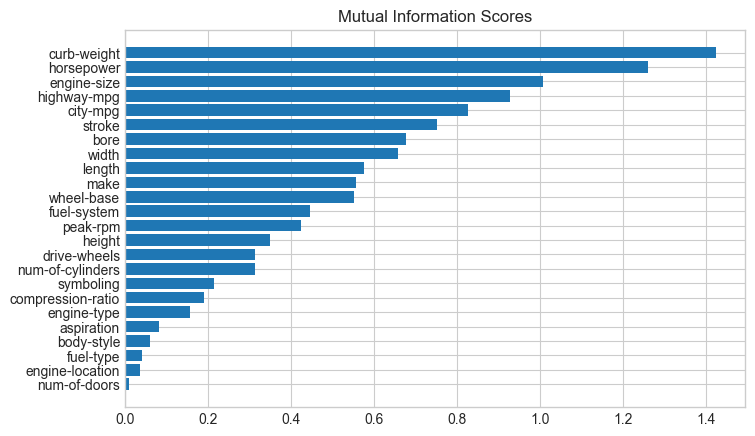

In [92]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

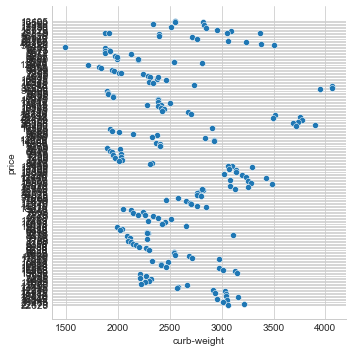

In [94]:
sns.relplot(x="curb-weight", y="price", data=df)

In [96]:
#sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df)

In [3]:
help(pd.Series.factorize)

Help on function factorize in module pandas.core.base:

factorize(self, sort: bool = False, na_sentinel: Optional[int] = -1)
    Encode the object as an enumerated type or categorical variable.
    
    This method is useful for obtaining a numeric representation of an
    array when all that matters is identifying distinct values. `factorize`
    is available as both a top-level function :func:`pandas.factorize`,
    and as a method :meth:`Series.factorize` and :meth:`Index.factorize`.
    
    Parameters
    ----------
    sort : bool, default False
        Sort `uniques` and shuffle `codes` to maintain the
        relationship.
    
    na_sentinel : int or None, default -1
        Value to mark "not found". If None, will not drop the NaN
        from the uniques of the values.
    
        .. versionchanged:: 1.1.2
    
    Returns
    -------
    codes : ndarray
        An integer ndarray that's an indexer into `uniques`.
        ``uniques.take(codes)`` will have the same values a

In [ ]:
# Combining these top features with other related features, especially those you've identified as creating interactions, 
# is a good strategy for coming up with a highly informative set of features to train your model on.